## 📊 Análise de Dados – Setor de Cibersegurança
Este notebook tem como objetivo explorar, analisar e extrair insights estratégicos do arquivo dataset_cyberseguranca.csv, que contém registros relevantes para o setor de cibersegurança. Através de técnicas de análise estatística, visualização de dados e modelagem preditiva, buscamos compreender padrões de ameaças, vulnerabilidades recorrentes, e comportamentos anômalos que possam impactar a segurança digital de organizações.
🔍 Objetivos principais:
- Realizar uma análise exploratória dos dados (EDA)
- Identificar tendências em incidentes de segurança
- Detectar possíveis correlações entre variáveis (ex: tipo de ataque vs. setor afetado)
- Avaliar a frequência e impacto de diferentes tipos de ameaças
- Propor recomendações baseadas em evidências para mitigação de riscos
🛡️ Aplicações:
Os resultados obtidos neste notebook podem ser utilizados para:
- Apoiar decisões estratégicas em políticas de segurança da informação
- Fortalecer sistemas de detecção e resposta a incidentes
- Desenvolver modelos preditivos para antecipar ataques cibernéticos
- Gerar relatórios para auditoria e conformidade regulatória


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset_ciberseguranca.csv to dataset_ciberseguranca.csv


In [ ]:
import pandas as pd

df = pd.read_csv('/content/dataset_ciberseguranca.csv')
df.head()

,ID_Incidente,Data_Hora,Tipo_Analise,Origem_Dados,Ferramenta_Usada,Descricao_Evento,Tipo_Ameaca,Vulnerabilidade_Identificada,Acao_Tomada,Norma_Conformidade,Risco_Associado,Setor_Alvo,Status
0,1,2025-01-12 06:05:48.542265,Risco Cibernético,Sistema Operacional,Splunk,Download de arquivo malicioso,Malware,Log4j,Escalonado,ISO 27001,Invasão interna,Governo,Aberto
1,2,2024-11-16 00:45:48.542265,Conformidade,Servidor,QRadar,Download de arquivo malicioso,Ransomware,Shellshock,Mitigação,Nenhuma,Alto,Tecnologia,Em Andamento
2,3,2025-02-15 17:14:24.542265,Eventos,Antivírus,Splunk,Acesso fora de horário,Ransomware,Nenhuma,Investigação,Nenhuma,Invasão interna,Governo,Em Andamento
3,4,2025-08-05 09:20:38.542265,Risco Cibernético,Antivírus,Splunk,Tráfego de rede incomum,Malware,Log4j,Fechado,LGPD,Baixo,Saúde,Fechado
4,5,2024-10-09 13:55:41.542265,Conformidade,Servidor,OpenVAS,Download de arquivo malicioso,Trojan Bancário,Heartbleed,Investigação,Nenhuma,Roubo de dados,Saúde,Aberto


## Pyspark

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, desc
import random
from datetime import datetime, timedelta
import numpy as np

In [ ]:
# Importa as classes necessárias
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, year, month, dayofmonth, to_timestamp

# Cria a sessão Spark
spark = SparkSession.builder \
    .appName("AnaliseCyberseguranca") \
    .getOrCreate()

# Caminho para o seu arquivo CSV
caminho_arquivo = "/content/dataset_ciberseguranca.csv"

# Lê o arquivo CSV com inferência de schema e cabeçalho
# A opção "timestampFormat" ajuda a garantir que a coluna Data_Hora seja lida corretamente
df = spark.read \
    .option("header", "true") \
    .option("inferSchema", "true") \
    .option("timestampFormat", "yyyy-MM-dd HH:mm:ss") \
    .csv(caminho_arquivo)

# Exibe o schema para garantir que a coluna 'Data_Hora' é do tipo 'timestamp'
df.printSchema()

# Mostra as 5 primeiras linhas para uma visualização rápida
df.show(5, truncate=False)

root
 |-- ID_Incidente: integer (nullable = true)
 |-- Data_Hora: string (nullable = true)
 |-- Tipo_Analise: string (nullable = true)
 |-- Origem_Dados: string (nullable = true)
 |-- Ferramenta_Usada: string (nullable = true)
 |-- Descricao_Evento: string (nullable = true)
 |-- Tipo_Ameaca: string (nullable = true)
 |-- Vulnerabilidade_Identificada: string (nullable = true)
 |-- Acao_Tomada: string (nullable = true)
 |-- Norma_Conformidade: string (nullable = true)
 |-- Risco_Associado: string (nullable = true)
 |-- Setor_Alvo: string (nullable = true)
 |-- Status: string (nullable = true)

+------------+--------------------------+-----------------+-------------------+----------------+-----------------------------+---------------+----------------------------+------------+------------------+---------------+----------+------------+
|ID_Incidente|Data_Hora                 |Tipo_Analise     |Origem_Dados       |Ferramenta_Usada|Descricao_Evento             |Tipo_Ameaca    |Vulnerabilidade

## Incidentes por tipo de ameaça

In [ ]:
df.groupBy("Tipo_Ameaca").count().orderBy(desc("count")).show()

+---------------+-----+
|    Tipo_Ameaca|count|
+---------------+-----+
|     Ransomware|  140|
|       Phishing|  131|
|Trojan Bancário|  116|
|        Malware|  113|
+---------------+-----+



## Ferramentas mais ultilizadas

In [ ]:
df.groupBy("Ferramenta_Usada").count().orderBy(desc("count")).show()

+----------------+-----+
|Ferramenta_Usada|count|
+----------------+-----+
|          Nessus|   91|
|          Qualys|   86|
|          Splunk|   85|
|          QRadar|   83|
|       ELK Stack|   79|
|         OpenVAS|   76|
+----------------+-----+



## Incidentes por setor alvo

In [ ]:
df.groupBy("Setor_Alvo").count().orderBy(desc("count")).show()

+----------+-----+
|Setor_Alvo|count|
+----------+-----+
|Financeiro|  114|
|     Saúde|  100|
|    Varejo|   97|
|   Governo|   95|
|Tecnologia|   94|
+----------+-----+



## Estrutura do dataset

In [ ]:
df.printSchema()

root
 |-- ID_Incidente: integer (nullable = true)
 |-- Data_Hora: string (nullable = true)
 |-- Tipo_Analise: string (nullable = true)
 |-- Origem_Dados: string (nullable = true)
 |-- Ferramenta_Usada: string (nullable = true)
 |-- Descricao_Evento: string (nullable = true)
 |-- Tipo_Ameaca: string (nullable = true)
 |-- Vulnerabilidade_Identificada: string (nullable = true)
 |-- Acao_Tomada: string (nullable = true)
 |-- Norma_Conformidade: string (nullable = true)
 |-- Risco_Associado: string (nullable = true)
 |-- Setor_Alvo: string (nullable = true)
 |-- Status: string (nullable = true)



## Contar registro por tipo de ataque

In [ ]:
df.groupBy("Tipo_Ameaca").count().orderBy("count", ascending=False).show()

+---------------+-----+
|    Tipo_Ameaca|count|
+---------------+-----+
|     Ransomware|  140|
|       Phishing|  131|
|Trojan Bancário|  116|
|        Malware|  113|
+---------------+-----+



## Total de incidentes registrados

In [ ]:
df.count()

500

## Vulnerabilidades mais encontradas

In [ ]:
df.groupBy("Vulnerabilidade_Identificada") \
  .count() \
  .orderBy("count", ascending=False) \
  .show()

+----------------------------+-----+
|Vulnerabilidade_Identificada|count|
+----------------------------+-----+
|                  Heartbleed|  111|
|                       Log4j|  103|
|                     Nenhuma|  101|
|              CVE-2017-11882|   94|
|                  Shellshock|   91|
+----------------------------+-----+



## Ações mais tomadas por eventos

In [ ]:
df.groupBy("Acao_Tomada") \
  .count() \
  .orderBy("count", ascending=False) \
  .show()

+------------+-----+
| Acao_Tomada|count|
+------------+-----+
|   Mitigação|  141|
|  Escalonado|  125|
|     Fechado|  117|
|Investigação|  117|
+------------+-----+



## Setores mais visados

In [ ]:
df.groupBy("Setor_Alvo") \
  .count() \
  .orderBy("count", ascending=False) \
  .show()

+----------+-----+
|Setor_Alvo|count|
+----------+-----+
|Financeiro|  114|
|     Saúde|  100|
|    Varejo|   97|
|   Governo|   95|
|Tecnologia|   94|
+----------+-----+



## Distribuições dos riscos associados

In [ ]:
df.groupBy("Risco_Associado") \
  .count() \
  .orderBy("count", ascending=False) \
  .show()

+---------------+-----+
|Risco_Associado|count|
+---------------+-----+
|Invasão interna|   84|
|          Baixo|   79|
| Roubo de dados|   77|
|           DDoS|   70|
|          Médio|   69|
|       Phishing|   63|
|           Alto|   58|
+---------------+-----+



## Status dos incidentes

In [ ]:
df.groupBy("Status") \
  .count() \
  .orderBy("count", ascending=False) \
  .show()

+------------+-----+
|      Status|count|
+------------+-----+
|Em Andamento|  176|
|      Aberto|  163|
|     Fechado|  161|
+------------+-----+



## Incidentes por data

In [ ]:
from pyspark.sql.functions import to_date, col, to_timestamp

# Convert the 'Data_Hora' column to a timestamp first
df = df.withColumn("Data_Hora_Timestamp", to_timestamp(col("Data_Hora"), "yyyy-MM-dd HH:mm:ss.SSSSSS"))

# Then convert the timestamp to a date
df = df.withColumn("Data", to_date(col("Data_Hora_Timestamp")))

# Now you can group by the new 'Data' column
df.groupBy("Data").count().orderBy("Data").show()

+----------+-----+
|      Data|count|
+----------+-----+
|2024-08-10|    1|
|2024-08-12|    1|
|2024-08-13|    1|
|2024-08-14|    2|
|2024-08-15|    2|
|2024-08-16|    1|
|2024-08-18|    2|
|2024-08-19|    1|
|2024-08-21|    2|
|2024-08-22|    1|
|2024-08-23|    2|
|2024-08-24|    2|
|2024-08-25|    2|
|2024-08-26|    2|
|2024-08-27|    1|
|2024-08-28|    2|
|2024-08-29|    1|
|2024-08-30|    1|
|2024-09-02|    3|
|2024-09-03|    2|
+----------+-----+
only showing top 20 rows



## Gráficos

In [ ]:
# Agrupando com PySpark
ameacas_df = df.groupBy("Tipo_Ameaca") \
               .count() \
               .orderBy("count", ascending=False)

# Convertendo para Pandas
ameacas_pd = ameacas_df.toPandas()

/tmp/ipython-input-1726108535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ameacas_pd, x="Tipo_Ameaca", y="count", palette="viridis")


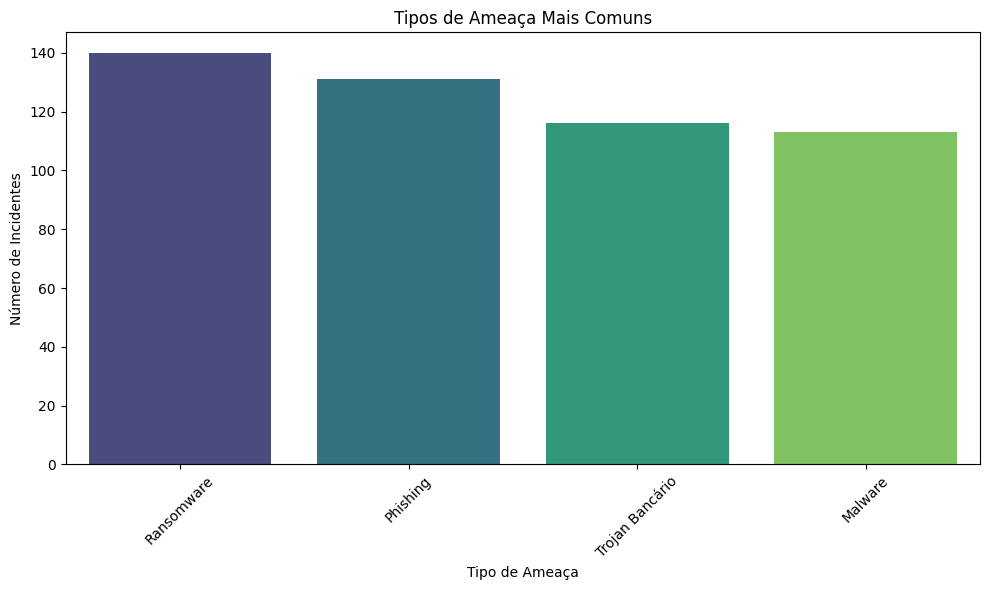

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=ameacas_pd, x="Tipo_Ameaca", y="count", palette="viridis")
plt.title("Tipos de Ameaça Mais Comuns")
plt.xlabel("Tipo de Ameaça")
plt.ylabel("Número de Incidentes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Criar gráfico com searborn

/tmp/ipython-input-1726108535.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ameacas_pd, x="Tipo_Ameaca", y="count", palette="viridis")


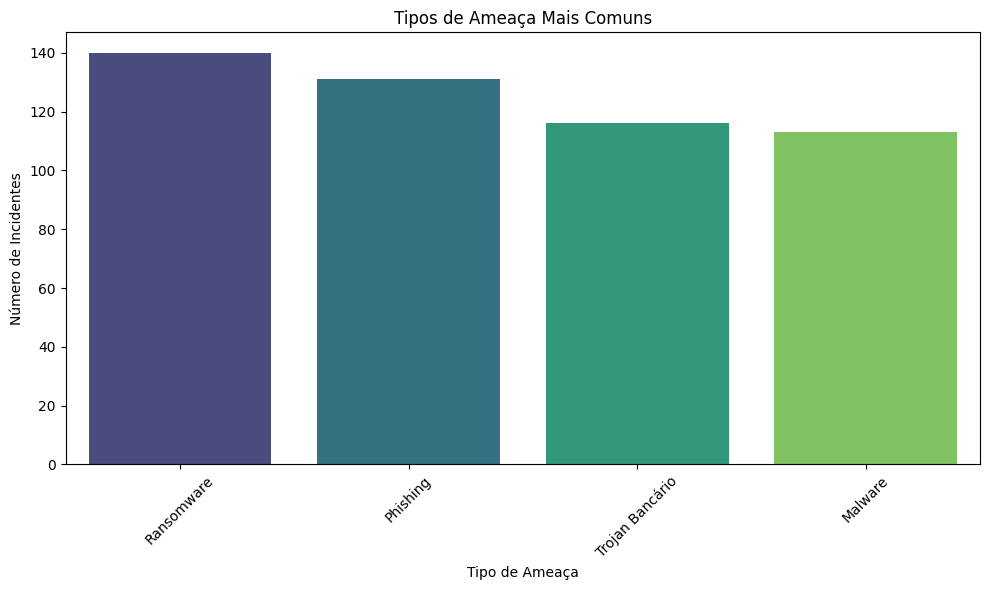

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=ameacas_pd, x="Tipo_Ameaca", y="count", palette="viridis")
plt.title("Tipos de Ameaça Mais Comuns")
plt.xlabel("Tipo de Ameaça")
plt.ylabel("Número de Incidentes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Gráfico de ferramentas mais usadas

/tmp/ipython-input-1508331767.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ferramentas_pd, x="Ferramenta_Usada", y="count", palette="mako")


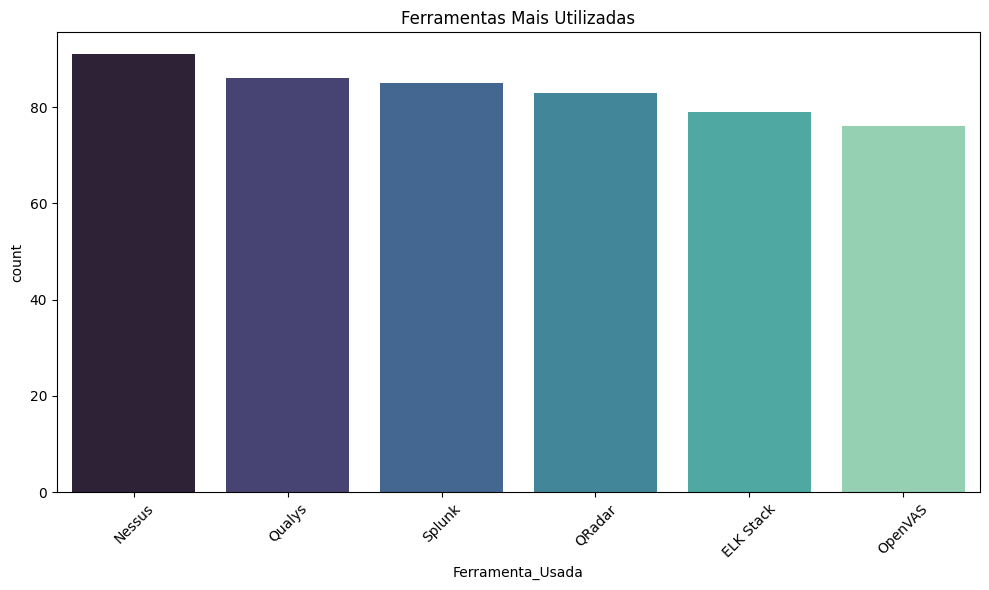

In [ ]:
ferramentas_pd = df.groupBy("Ferramenta_Usada").count().orderBy("count", ascending=False).toPandas()

plt.figure(figsize=(10,6))
sns.barplot(data=ferramentas_pd, x="Ferramenta_Usada", y="count", palette="mako")
plt.title("Ferramentas Mais Utilizadas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Distribuições de riscos

/tmp/ipython-input-3360782365.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=riscos_pd, x="Risco_Associado", y="count", palette="rocket")


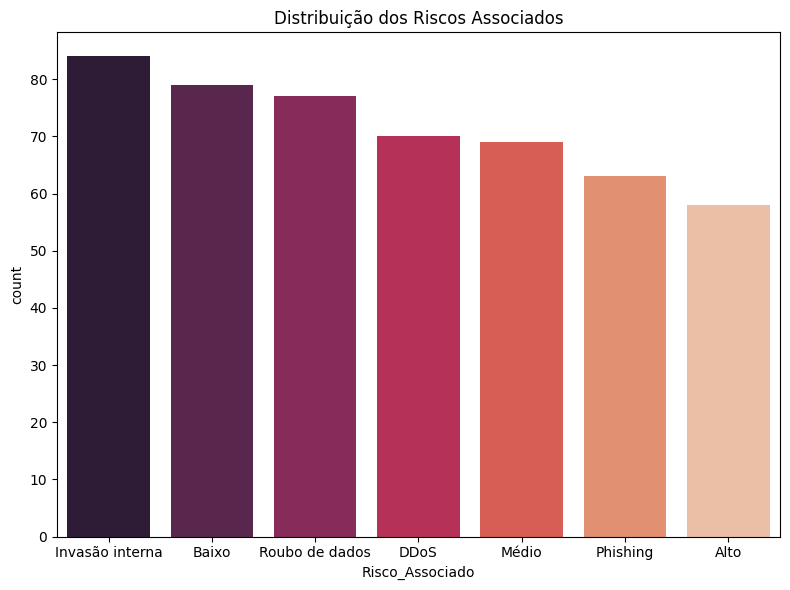

In [ ]:
riscos_pd = df.groupBy("Risco_Associado").count().orderBy("count", ascending=False).toPandas()

plt.figure(figsize=(8,6))
sns.barplot(data=riscos_pd, x="Risco_Associado", y="count", palette="rocket")
plt.title("Distribuição dos Riscos Associados")
plt.tight_layout()
plt.show()

##  Gráfico de pizza: Setor afetado

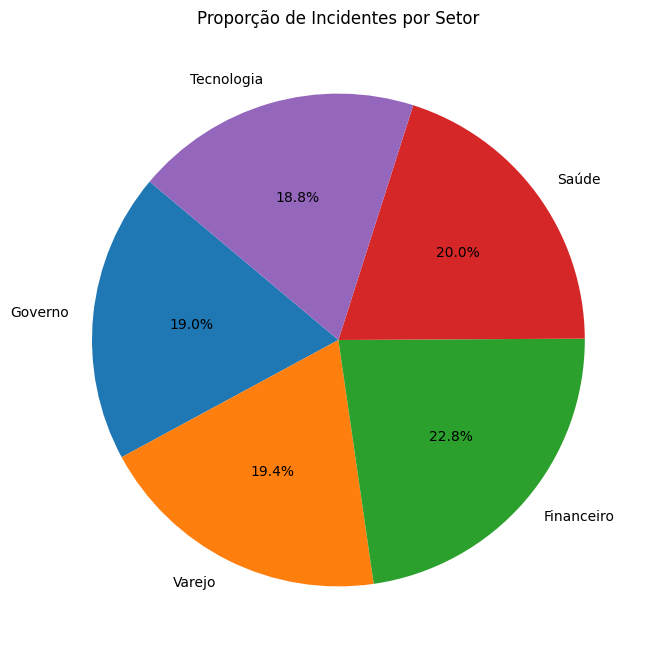

In [ ]:
setores = df.groupBy("Setor_Alvo").count().toPandas()

plt.figure(figsize=(8,8))
plt.pie(setores['count'], labels=setores['Setor_Alvo'], autopct='%1.1f%%', startangle=140)
plt.title("Proporção de Incidentes por Setor")
plt.show()

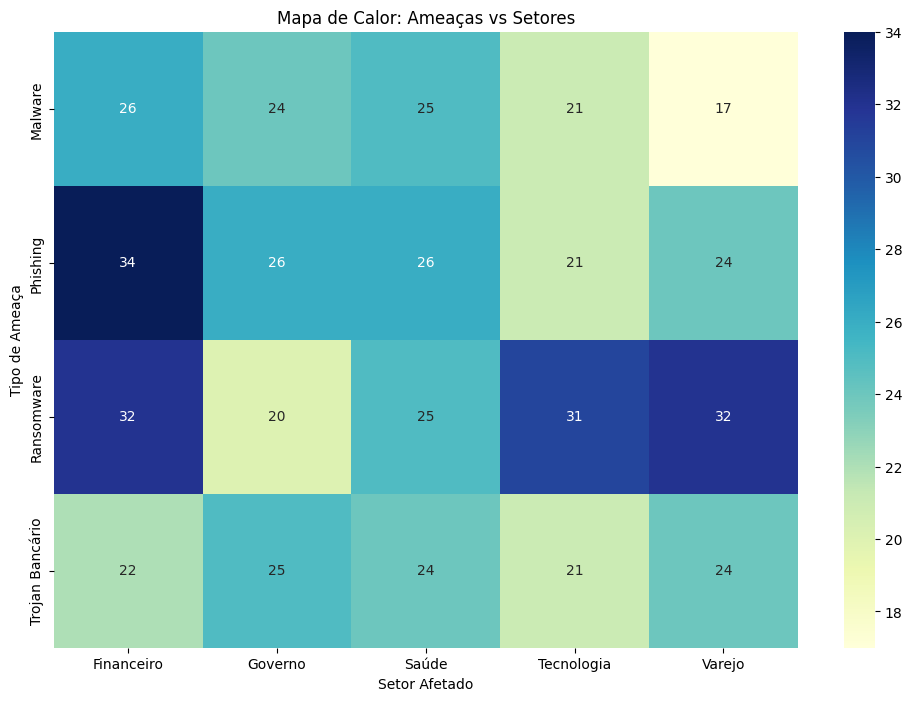

In [ ]:
# Tabela cruzada
tabela = pd.crosstab(df_pd['Tipo_Ameaca'], df_pd['Setor_Alvo'])

# Mapa de calor
plt.figure(figsize=(12,8))
sns.heatmap(tabela, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Mapa de Calor: Ameaças vs Setores")
plt.xlabel("Setor Afetado")
plt.ylabel("Tipo de Ameaça")
plt.show()

In [ ]:
df.printSchema()

root
 |-- ID_Incidente: integer (nullable = true)
 |-- Data_Hora: string (nullable = true)
 |-- Tipo_Analise: string (nullable = true)
 |-- Origem_Dados: string (nullable = true)
 |-- Ferramenta_Usada: string (nullable = true)
 |-- Descricao_Evento: string (nullable = true)
 |-- Tipo_Ameaca: string (nullable = true)
 |-- Vulnerabilidade_Identificada: string (nullable = true)
 |-- Acao_Tomada: string (nullable = true)
 |-- Norma_Conformidade: string (nullable = true)
 |-- Risco_Associado: string (nullable = true)
 |-- Setor_Alvo: string (nullable = true)
 |-- Status: string (nullable = true)
 |-- Data: date (nullable = true)
 |-- Data_Hora_Timestamp: timestamp (nullable = true)



## Dashboard Cybersegurança

In [55]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Carregar o dataset
df = pd.read_csv('/content/dataset_ciberseguranca.csv')

# Inicializar o app
app = dash.Dash(__name__)
app.title = "Dashboard de Cibersegurança"

# Layout do dashboard
app.layout = html.Div([
    html.H1("📊 Dashboard de Cibersegurança", style={'textAlign': 'center', 'color': '#2c3e50'}),

    html.Div([
        html.Label("Selecione o Ano:", style={'fontWeight': 'bold'}),
        dcc.Dropdown(
            id='ano-dropdown',
            options=[{'label': str(ano), 'value': ano} for ano in sorted(df['Data_Hora'].unique())],
            value=sorted(df['Data_Hora'].unique())[0],
            style={'width': '50%'}
        )
    ], style={'padding': '20px'}),

    html.Div([
        dcc.Graph(id='grafico-barras', style={'width': '48%', 'display': 'inline-block'}),
        dcc.Graph(id='grafico-pizza', style={'width': '48%', 'display': 'inline-block'})
    ])
], style={'fontFamily': 'Arial', 'backgroundColor': '#f9f9f9', 'padding': '20px'})

# Callback para atualizar os gráficos
@app.callback(
    [Output('grafico-barras', 'figure'),
     Output('grafico-pizza', 'figure')],
    Input('ano-dropdown', 'value')
)
def atualizar_graficos(ano_selecionado):
    df_filtrado = df[df['Data_Hora'] == ano_selecionado]
    ameacas = df_filtrado['Tipo_Ameaca'].value_counts().reset_index()
    ameacas.columns = ['Tipo_Ameaca', 'Quantidade']

    # Gráfico de barras
    fig_bar = px.bar(
        ameacas,
        x='Tipo_Ameaca',
        y='Quantidade',
        title=f"Tipos de Ameaça em {ano_selecionado}",
        color='Quantidade',
        color_continuous_scale='Blues'
    )
    fig_bar.update_layout(plot_bgcolor='white')

    # Gráfico de pizza
    fig_pie = px.pie(
        ameacas,
        names='Tipo_Ameaca',
        values='Quantidade',
        title=f"Distribuição Percentual de Ameaças ({ano_selecionado})",
        color_discrete_sequence=px.colors.sequential.RdBu
    )

    return fig_bar, fig_pie

# Rodar o servidor
if __name__ == '__main__':
    app.run(debug=True)

<IPython.core.display.Javascript object>